#                               World Happiness Report Project

In [56]:
!pip install seaborn

In [57]:
import pandas as pd

In [58]:
import numpy as np

In [59]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

In [61]:
import warnings

In [62]:
warnings.filterwarnings('ignore')

In [63]:
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler

In [64]:
df = pd.read_csv("world happiness.csv")

In [65]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [66]:
df.head() #Top 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [67]:
df.tail() #Last 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [68]:
df.sample() #any random row

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
28,France,Western Europe,29,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126


In [69]:
df.shape #No. of rows and column

(158, 12)

In [70]:
df.dtypes #Check data types

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [71]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [72]:
df.isnull()# check if any null row 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
df.isnull().sum() #sum of null rows

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

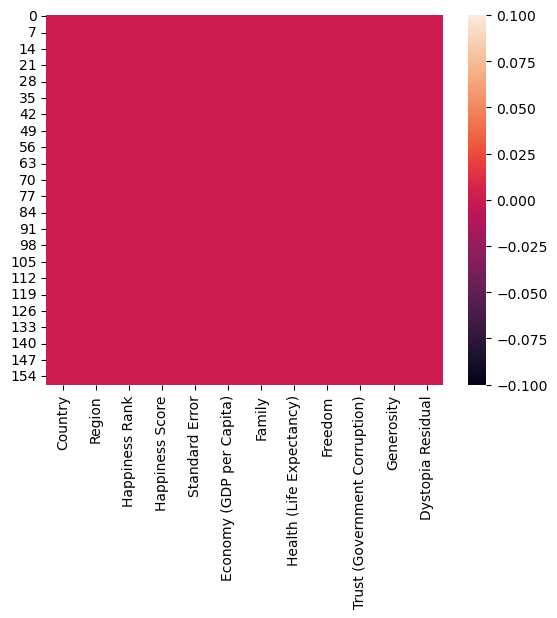

In [74]:
sns.heatmap(df.isnull())

In [75]:
df.columns #Names of columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [76]:
df.describe() #statistical info.

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


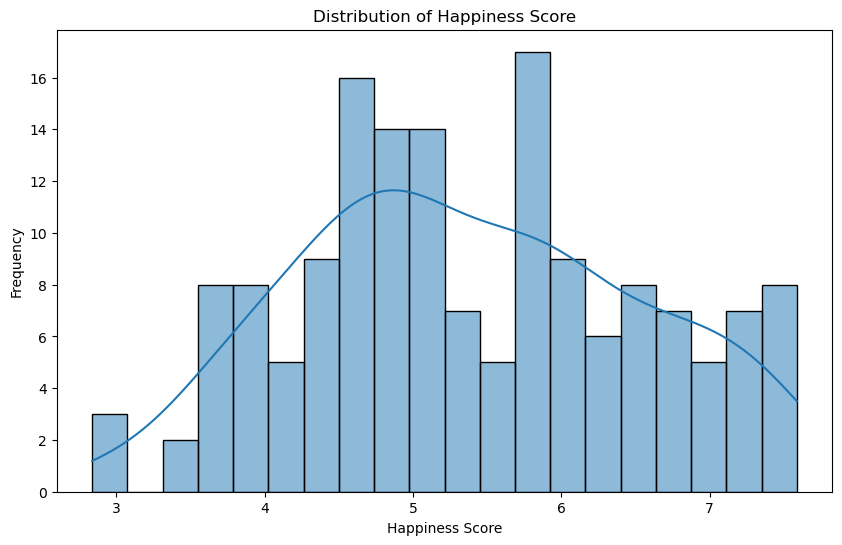

In [77]:
# Distribution of Happiness Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness Score'], bins=20, kde=True)
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

In [78]:
!pip install pandas

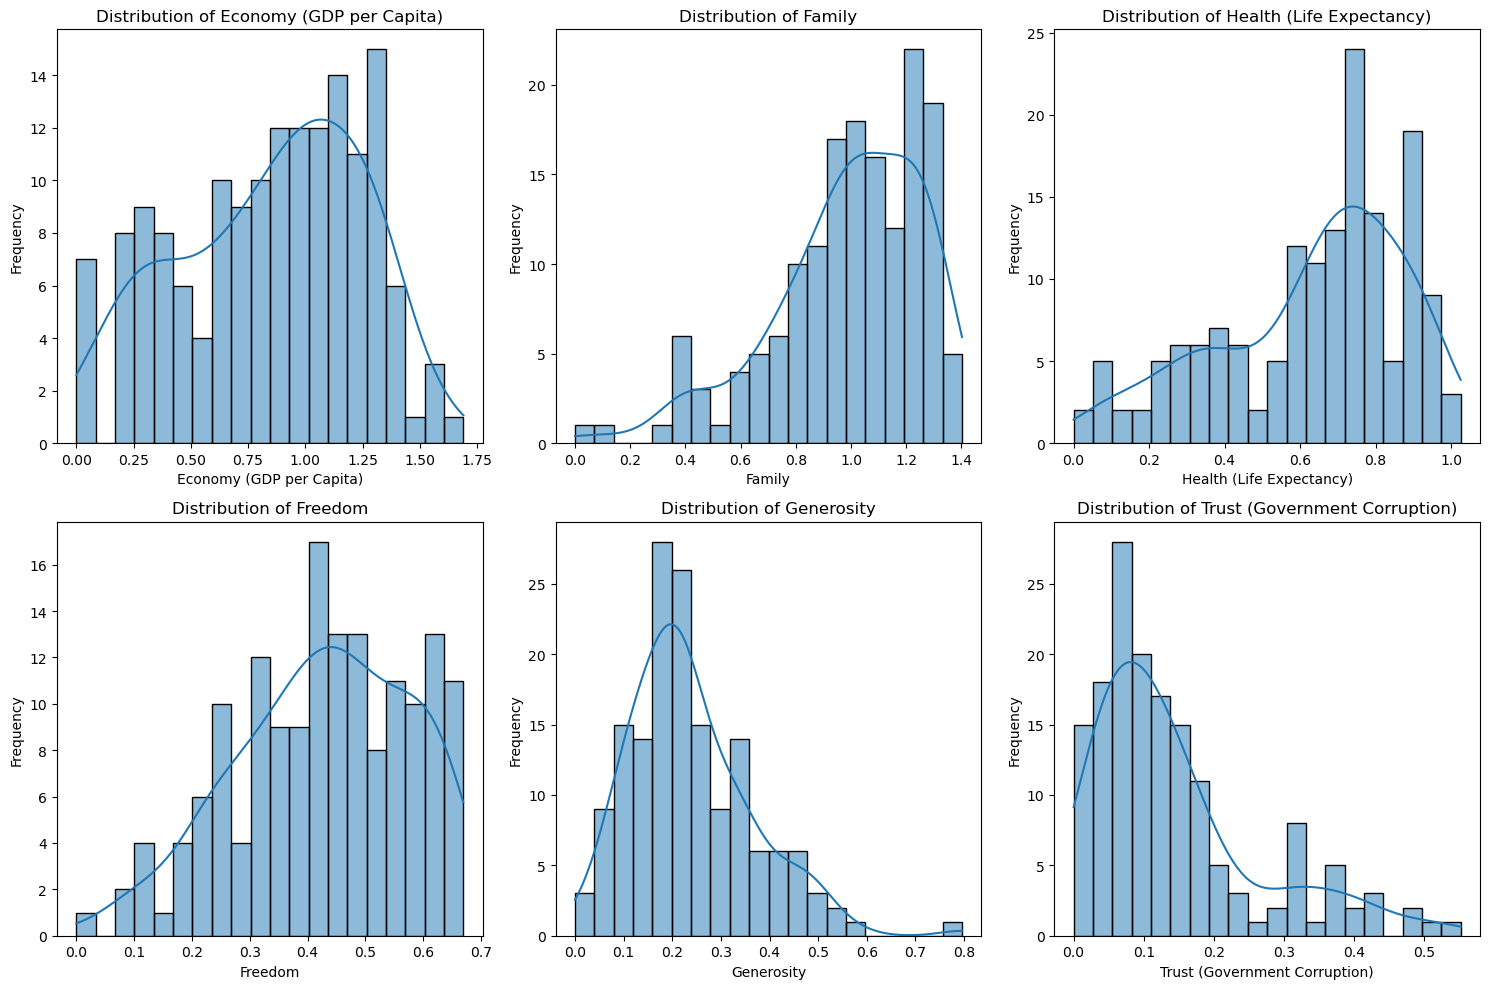

In [79]:
# Distribution of other key variables
key_vars = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [80]:
#unique values of each column
r=[]
for columns in df:
    r=df[columns].unique()
    print(r)

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

In [81]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [82]:
# Calculate unique values for each column
unique_values = df.apply(pd.Series.nunique)
print("\nUnique Values:")
print(unique_values)


Unique Values:
Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64


In [83]:
#we can see that maximum repeated values are in 'region'

In [84]:
# Identify and handle duplicate rows
duplicate_rows=df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


In [85]:
# Remove duplicate rows
data_no_duplicates = df.drop_duplicates()
print("\nDataset after removing duplicates:")
print(data_no_duplicates)


Dataset after removing duplicates:
         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.396

In [86]:
# Correlation matrix to understand relationships between variables
correlation_matrix=df.corr()
print(correlation_matrix)

                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000   

In [87]:
# Explore the relationship using scatter plots
key_vars = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

<Figure size 1500x1000 with 0 Axes>

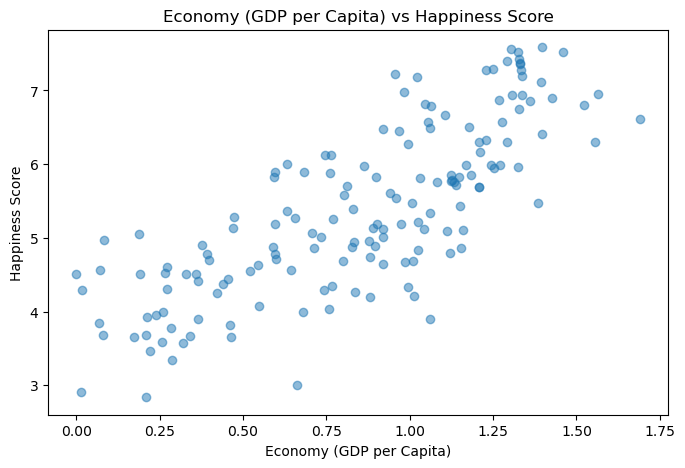

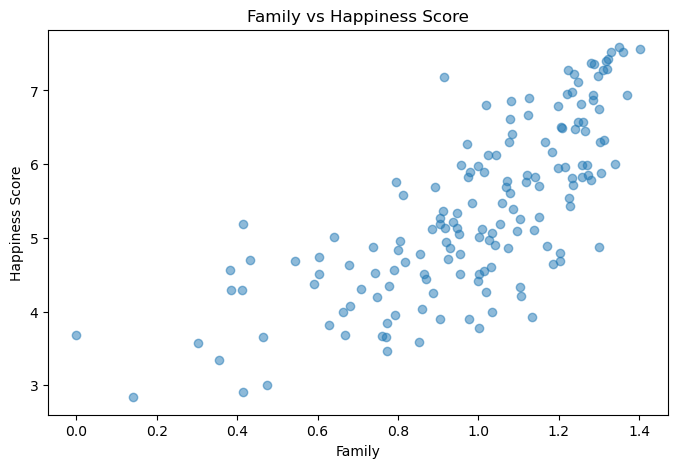

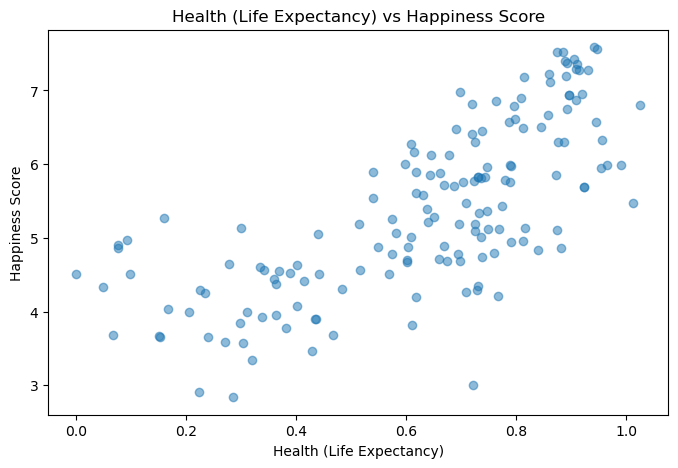

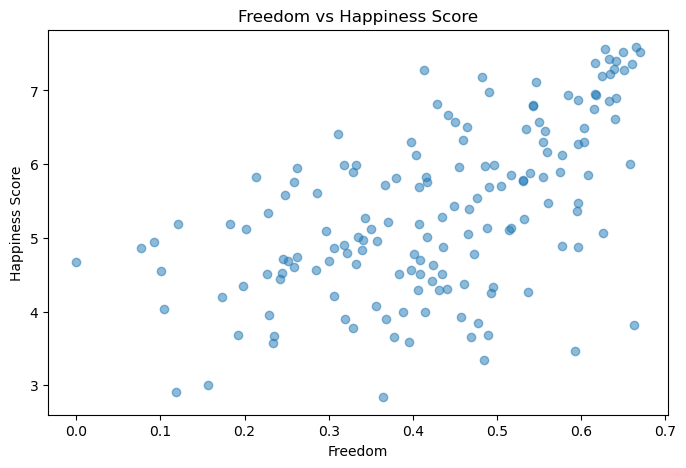

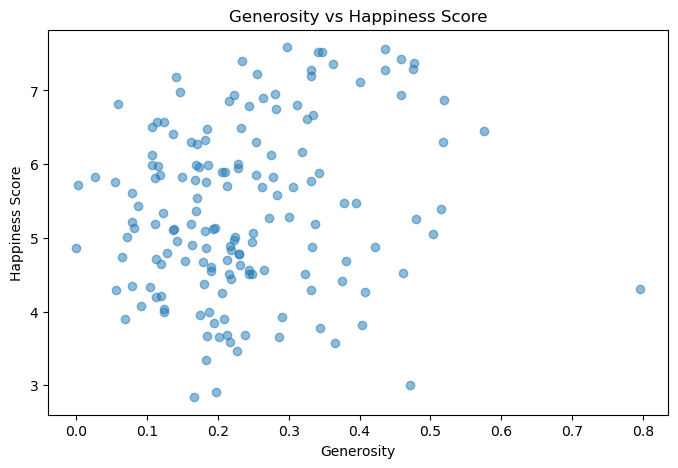

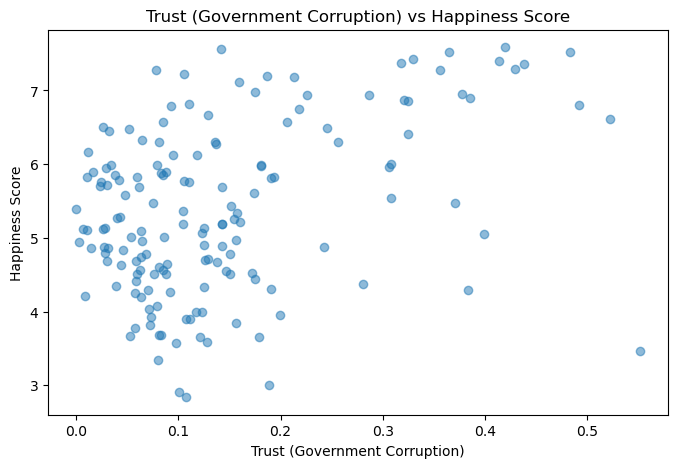

In [88]:
plt.figure(figsize=(15, 10))
for var in key_vars:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[var], df['Happiness Score'], alpha=0.5)
    plt.title(f'{var} vs Happiness Score')
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.show()

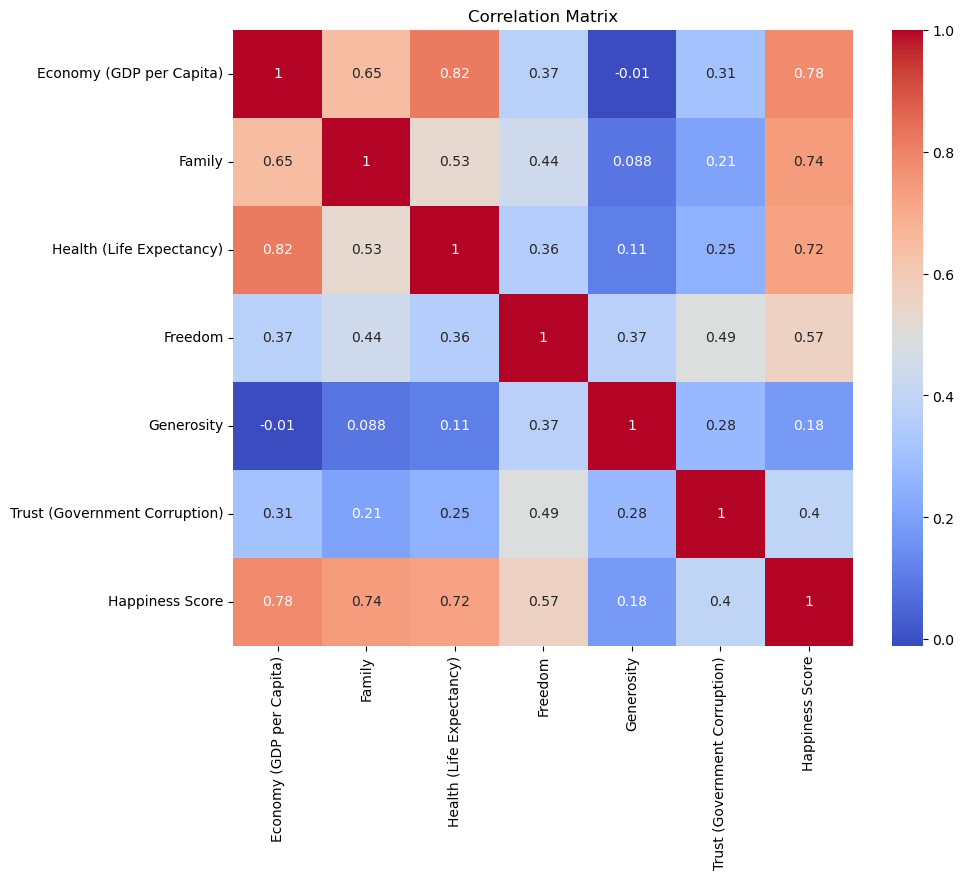

In [89]:
# Visualize the relationships using correlation matrix
correlation_matrix = df[key_vars + ['Happiness Score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [90]:
# Perform feature selection using correlation
target_correlation = correlation_matrix['Happiness Score'].abs().sort_values(ascending=False)
selected_features = target_correlation[1:4]  # Select top 3 features
print("Selected features:", selected_features)

Selected features: Economy (GDP per Capita)    0.780966
Family                      0.740605
Health (Life Expectancy)    0.724200
Name: Happiness Score, dtype: float64


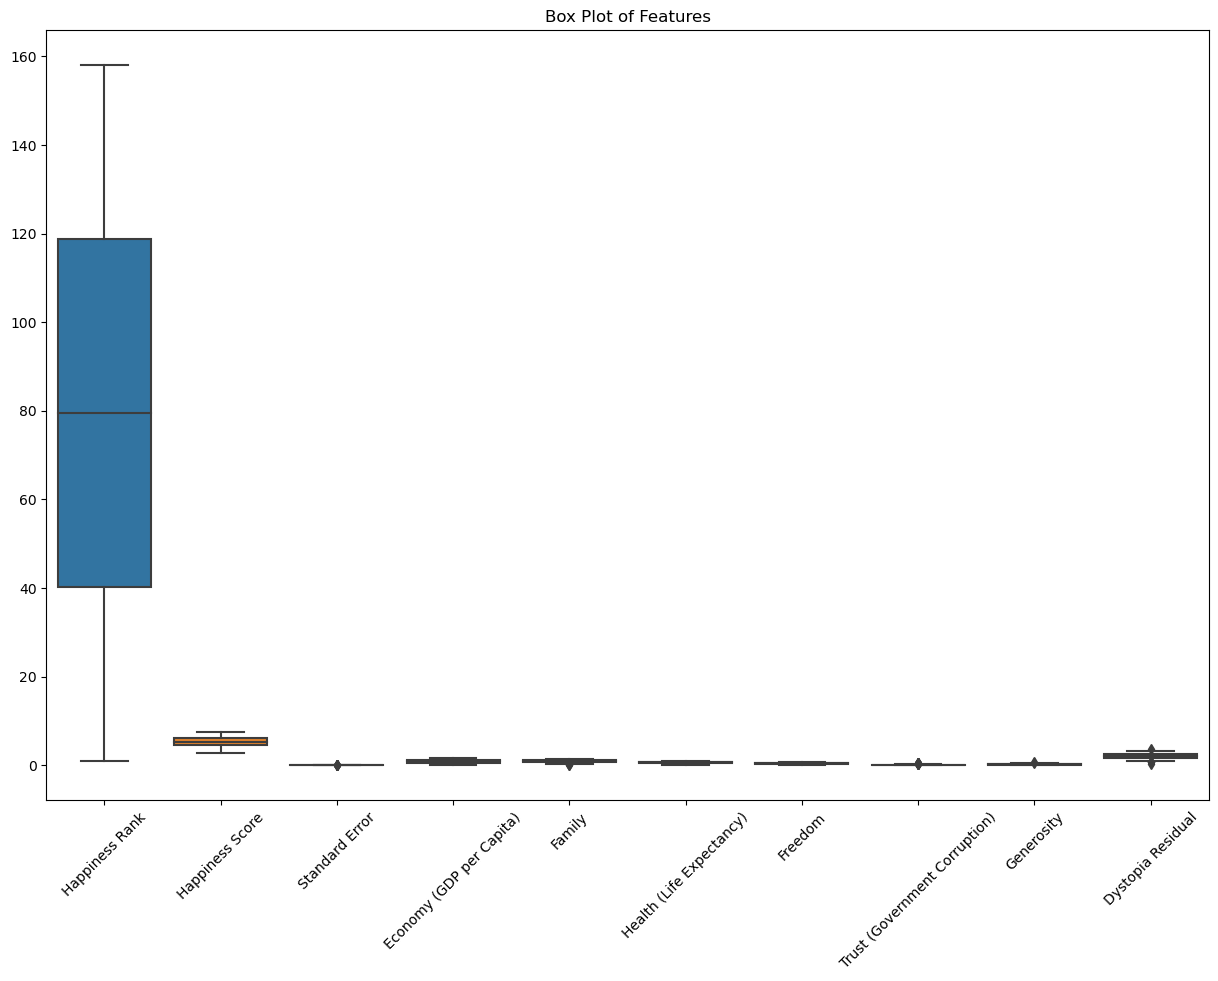

In [91]:
# Check for outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['Country', 'Region'], axis=1))
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.show()

In [92]:
# Identify and remove outliers (considering a simple method using z-score)
z_scores = np.abs((df - df.mean()) / df.std())
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Keep only rows where z-scores are less than 3
df_no_outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [93]:
# Check skewness of features
skewness = df_no_outliers[key_vars].apply(lambda x: skew(x))
print("Skewness of Features:")
print(skewness)

Skewness of Features:
Economy (GDP per Capita)        NaN
Family                          NaN
Health (Life Expectancy)        NaN
Freedom                         NaN
Generosity                      NaN
Trust (Government Corruption)   NaN
dtype: float64


In [94]:
# Address skewness by performing log transformation on skewed features
skewed_features = skewness[skewness > 0.5].index
df_no_outliers[skewed_features] = np.log1p(df_no_outliers[skewed_features])

In [95]:
# Verify skewness after transformation
skewness_after = df_no_outliers[skewed_features].apply(lambda x: skew(x))
print("Skewness After Transformation:")
print(skewness_after)

Skewness After Transformation:
Series([], dtype: float64)


In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# Define features (X) and target variable (y)
x = df.drop('Happiness Score', axis=1)  # Features
y = df['Happiness Score']  # Target variable

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Drop non-numeric columns and the target variable
x = df.drop(['Country', 'Region', 'Happiness Score'], axis=1)
y = df['Happiness Score']

In [103]:
# Handle missing values (example: imputation with mean)
x.fillna(x.mean(), inplace=True)

In [105]:
# Perform one-hot encoding on categorical variables
x = pd.get_dummies(x, drop_first=True)

In [107]:
# Scale features using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [108]:
# Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [109]:
# Display the VIF values
print(vif_data)

                         feature        VIF
0                 Happiness Rank  71.573977
1                 Standard Error   1.177539
2       Economy (GDP per Capita)  12.578340
3                         Family   5.539781
4       Health (Life Expectancy)   7.951242
5                        Freedom   3.079817
6  Trust (Government Corruption)   1.948717
7                     Generosity   1.898209
8              Dystopia Residual  16.988518


In [111]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [112]:
# Define regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [116]:
# Train and evaluate models using cross-validation
for name, model in models:
    scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5
    print(f'{name}:')
    print('Mean RMSE:', rmse_scores.mean())
    print('Standard Deviation:', rmse_scores.std())
    print()

Linear Regression:
Mean RMSE: 0.0002926258869079599
Standard Deviation: 3.310099183757005e-05

Decision Tree:
Mean RMSE: 0.43243208171109737
Standard Deviation: 0.21155268006073022

Random Forest:
Mean RMSE: 0.4477355555127754
Standard Deviation: 0.22184442747571087

Gradient Boosting:
Mean RMSE: 0.40473854768926687
Standard Deviation: 0.21589576346762118



In [117]:
#We calculate the Root Mean Squared Error (RMSE) scores for each fold

In [118]:
# Train and evaluate models
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name}:')
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('Mean Absolute Error (MAE):', mae)
    print('R-squared:', r2)
    print()

Linear Regression:
Mean Squared Error (MSE): 7.42742403732791e-08
Root Mean Squared Error (RMSE): 0.0002725330078601106
Mean Absolute Error (MAE): 0.00023374650842923617
R-squared: 0.9999999476481373

Decision Tree:
Mean Squared Error (MSE): 0.002877874999999994
Root Mean Squared Error (RMSE): 0.053645829288025686
Mean Absolute Error (MAE): 0.039249999999999965
R-squared: 0.997971542809437

Random Forest:
Mean Squared Error (MSE): 0.002390705487500076
Root Mean Squared Error (RMSE): 0.04889484111335342
Mean Absolute Error (MAE): 0.02975125000000041
R-squared: 0.9983149220391303

Gradient Boosting:
Mean Squared Error (MSE): 0.001237691937517293
Root Mean Squared Error (RMSE): 0.03518084617398071
Mean Absolute Error (MAE): 0.023120386967641085
R-squared: 0.9991276184301408



In [125]:
# Train Gradient Boosting model
model = GradientBoostingRegressor(random_state=42) 
model.fit(x_train, y_train)
#because high accuracy with less error

GradientBoostingRegressor(random_state=42)

In [126]:
# Interpret feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                         Feature  Importance
0                 Happiness Rank    0.999807
1                 Standard Error    0.000113
4       Health (Life Expectancy)    0.000036
7                     Generosity    0.000030
3                         Family    0.000005
2       Economy (GDP per Capita)    0.000003
8              Dystopia Residual    0.000002
6  Trust (Government Corruption)    0.000002
5                        Freedom    0.000001


In [127]:
# Predict happiness scores on the testing data
y_pred = model.predict(x_test)

In [128]:
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.03518084617398071


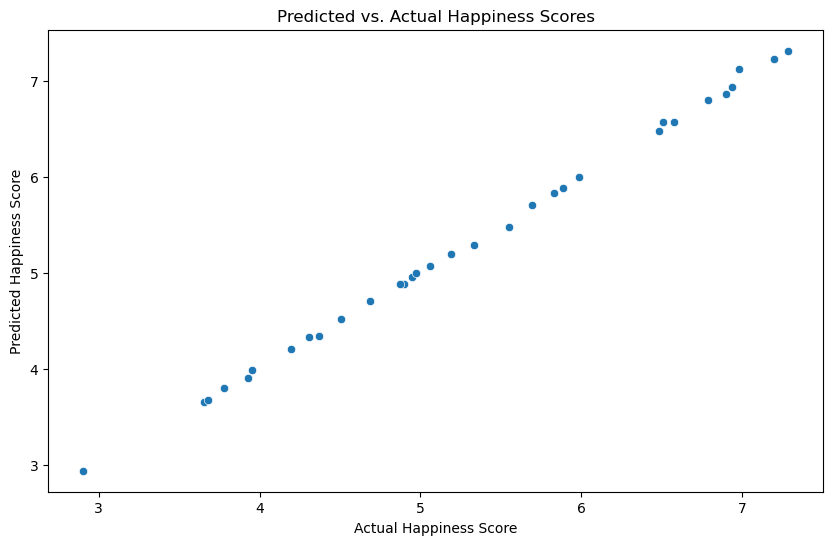

In [129]:
# Visualize predicted vs. actual scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Predicted vs. Actual Happiness Scores')
plt.show()

In [132]:
print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [133]:
# Train Linear Regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [134]:
# Define coefficients and intercept from the trained model
coefficients = model.coef_
intercept = model.intercept_

In [135]:
# Define feature values for a specific country
feature_values = [1.2, 0.9, 0.85, 0.6, 0.2, 0.3]  # Replace with actual feature values

In [136]:
# Calculate predicted happiness score
predicted_score = intercept + sum(coeff * feat for coeff, feat in zip(coefficients, feature_values))
print("Predicted Happiness Score:", predicted_score)

Predicted Happiness Score: 1.9505553712675856
